<a href="https://colab.research.google.com/github/Aspire-Mayank/EVA/blob/master/Session23/Assignment/Face_Recognition_and_Allignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initializer

In [0]:
DATA_PATH = './'
MODEL_PATH = './'

#### Import Libs
`Dlib, Open CV, Numpy, math, sys`

In [0]:
import dlib
import cv2
import numpy as np
import math, sys

#### Initialize Matplotlib

In [0]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0,15.0)
matplotlib.rcParams['image.cmap'] = 'gray'

import matplotlib.pyplot as plt
%matplotlib inline

#### Download Test image
Download a image from `https://github.com/yoyoasa/visutils/blob/master/photos/20180423_192823.jpg?raw=true`

In [0]:
!wget -O test.jpg https://github.com/yoyoasa/visutils/blob/master/photos/20180423_192823.jpg?raw=true 

--2019-12-03 13:24:02--  https://github.com/yoyoasa/visutils/blob/master/photos/20180423_192823.jpg?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yoyoasa/visutils/raw/master/photos/20180423_192823.jpg [following]
--2019-12-03 13:24:07--  https://github.com/yoyoasa/visutils/raw/master/photos/20180423_192823.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yoyoasa/visutils/master/photos/20180423_192823.jpg [following]
--2019-12-03 13:24:07--  https://raw.githubusercontent.com/yoyoasa/visutils/master/photos/20180423_192823.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443...

#### Load and display image

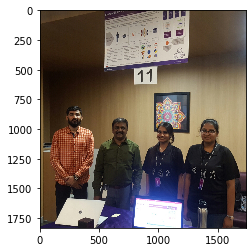

In [0]:
# Read image
imageFilename = DATA_PATH + "test.jpg"
im = cv2.imread(imageFilename)

# landmarks will be stored
landmarksBasename = "person"

plt.imshow(im[:,:,::-1])
plt.show()

#### Download Video

Download a video from `https://github.com/yoyoasa/visutils/blob/master/photos/ammar_face_video.mov?raw=true`

In [0]:
!wget -O test.mov https://github.com/yoyoasa/visutils/blob/master/photos/ammar_face_video.mov?raw=true

--2019-12-03 13:24:11--  https://github.com/yoyoasa/visutils/blob/master/photos/ammar_face_video.mov?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yoyoasa/visutils/raw/master/photos/ammar_face_video.mov [following]
--2019-12-03 13:24:11--  https://github.com/yoyoasa/visutils/raw/master/photos/ammar_face_video.mov
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yoyoasa/visutils/master/photos/ammar_face_video.mov [following]
--2019-12-03 13:24:11--  https://raw.githubusercontent.com/yoyoasa/visutils/master/photos/ammar_face_video.mov
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:4

#### Download and extract 64 landmark model file

In [0]:
!wget -O shape_predictor_68_face_landmarks.dat.bz2 http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2019-12-03 13:24:14--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  16.9MB/s    in 3.8s    

2019-12-03 13:24:18 (16.1 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [0]:
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

Initialize `shape_predictor_68_face_landmarks.dat` model path



In [0]:
PREDICTOR_PATH_64 = MODEL_PATH + "shape_predictor_68_face_landmarks.dat"

#### Initialize the Landmark Predictor 64 (a.k.a Shape predictor)
The shape_predictor class implements Dlib’s facial landmark detector. As the name suggests, it can be used to detect other landmark points ( e.g. the four corners of a credit card ) when trained to do so. Load the facial landmark detector model file. The information in the file makes the generic shape_predictor - a facial landmark detector.

In [0]:
landmarkDetector_64 = dlib.shape_predictor(PREDICTOR_PATH_64)

#### Download and extract 5 landmark model file

In [0]:
!wget -O shape_predictor_5_face_landmarks.dat.bz2 http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2

--2019-12-03 13:24:37--  http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5706710 (5.4M)
Saving to: ‘shape_predictor_5_face_landmarks.dat.bz2’

shape_predictor_5_f 100%[===================>]   5.44M  3.30MB/s    in 1.7s    

2019-12-03 13:24:39 (3.30 MB/s) - ‘shape_predictor_5_face_landmarks.dat.bz2’ saved [5706710/5706710]



In [0]:
!bzip2 -d shape_predictor_5_face_landmarks.dat.bz2

In [0]:
# Landmark model location
PREDICTOR_PATH_5 = MODEL_PATH + "shape_predictor_5_face_landmarks.dat"

#### Initialize the Landmark Predictor 5


In [0]:
# The landmark detector is implemented in the shape_predictor class
landmarkDetector_5 = dlib.shape_predictor(PREDICTOR_PATH_5)

#### Initialize the Face detector
Dlib has a built-in face detector which can be accessed using `get_frontal_face_detector()`. Notice that we did not have to specify a model file for Dlib’s face detector because the face detector is built into the code.

In [0]:
faceDetector = dlib.get_frontal_face_detector()

## Detect Faces 

First, we need to detect faces by passing the image to Dlib’s face detector. In the example image, there are multiple faces. The 0 signifies that no up-scaling is done. To detect small faces, you can upscale the image.

In [0]:
# Detect faces in the image
faceRects = faceDetector(im, 0)
print("Number of faces detected: ", len(faceRects))

Number of faces detected:  4


#### Rendering Facial Landmarks
In this section, we will go over the code used for displaying landmarks on the face. There are two different rendering methods.

1. `Draws outline:` For Dlib’s 68-point model, we draw the outline of the face using open and closed polygons. In `OpenCV`, this is done using the function `p`olylines()`.

2. `Draws points:` For models the number of points is not 68, we have written a generic renderer that simply displays all the points as dots.

The `drawPolyline` function shown below takes in an image and landmarks as input.

The `x` and `y` coordinates of the ith point is accessed using `landmarks.part(i).x` and `landmarks.part(i).y` respectively.

The landmark points are copied to a numpy array and `cv2.polylines` is used to draw the lines on the image connecting landmarks at index start and index end.
The usage of polylines is shown below:

```
img = cv.polylines(img, pts, isClosed, color[, thickness[, lineType[, shift]]])
```

#### Where,

`img` - Image.

`pts` - Array of polygonal curves.

`isClosed` - Flag indicating whether the drawn polylines are closed or not. If they are closed, the function draws a line from the last vertex of each curve to its first vertex.

`color` - Polyline color.

`thickness` - Thickness of the polyline edges.

`lineType` - Type of the line segments. See LineTypes

`shift` - Number of fractional bits in the vertex coordinates.

In [0]:
#@title Rendering Facial Landmarks
import cv2
import numpy as np


def drawPolyline(im, landmarks, start, end, isClosed=False):
  points = []
  for i in range(start, end+1):
    point = [landmarks.part(i).x, landmarks.part(i).y]
    points.append(point)

  points = np.array(points, dtype=np.int32)
  cv2.polylines(im, [points], isClosed, (255, 200, 0), thickness=2, lineType=cv2.LINE_8)
  
# Use this function for 68-points facial landmark detector model
def renderFace(im, landmarks):
    assert(landmarks.num_parts == 68)
    drawPolyline(im, landmarks, 0, 16)           # Jaw line
    drawPolyline(im, landmarks, 17, 21)          # Left eyebrow
    drawPolyline(im, landmarks, 22, 26)          # Right eyebrow
    drawPolyline(im, landmarks, 27, 30)          # Nose bridge
    drawPolyline(im, landmarks, 30, 35, True)    # Lower nose
    drawPolyline(im, landmarks, 36, 41, True)    # Left eye
    drawPolyline(im, landmarks, 42, 47, True)    # Right Eye
    drawPolyline(im, landmarks, 48, 59, True)    # Outer lip
    drawPolyline(im, landmarks, 60, 67, True)    # Inner lip

# The following version of renderFace is used for displaying landmark points as dots. 
# The landmarks need to be supplied as a numpy array of landmark points. 
# You can choose the color and size (radius) of the dot.

# Use this function for any model other than
# 68 points facial_landmark detector model
def renderFace2(im, landmarks, color=(0, 255, 0), radius=3):
  for p in landmarks.parts():
    cv2.circle(im, (p.x, p.y), radius, color, -1)

#### Writing Facial Landmarks to Disk 
The landmarks are written to disk by accessing the x and y coordinates of the ith point using `landmarks.part(i).x()` and `landmarks.part(i).y()` respectively.

The code below shows how to write landmarks to a file. An output file stream is opened and the `(x, y)` coordinates of a point are written with a space in between them. Each row contains one point. Here we iterate over the parts of the landmarks and access the x and y coordinate as `p.x` and `p.y` respectively.

In [0]:
def writeLandmarksToFile(landmarks, landmarksFileName):
    with open(landmarksFileName, 'w') as f:
        for p in landmarks.parts():
            f.write("%s %s\n" %(int(p.x),int(p.y))) 
    f.close()

#### Detect landmarks for each face
Next, we loop over all the face rectangles and perform landmark detection for every face.

Dlib’s landmark detector needs two inputs

1. Input image.
2. Face rectangle

The output landmarks are stored in an instance of the class `full_object_detection.`

A few important methods of `full_object_detection` are listed below

1. `num_parts()` : Number of landmark points.
2. `part(i)` : The ith landmark point
3. `part(i).x()` and `part(i).y()` can be used to access the x and y coordinates of the ith landmark point.

We will use these methods very frequently.

The `landmarkDetector` detects the landmarks and all the detected landmarks are stored in a list `landmarksAll`

Number of landmarks 68
Saving landmarks to person_0.txt
Saving landmarks to person_1.txt
Saving landmarks to person_2.txt
Saving landmarks to person_3.txt
Saving output image to test_out.jpg


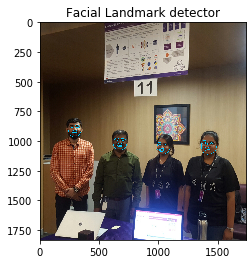

In [0]:
# List to store landmarks of all detected faces
landmarksAll = []

im_out = im.copy()

# Loop over all detected face rectangles
for i in range(0, len(faceRects)):
  newRect = dlib.rectangle(int(faceRects[i].left()),
                          int(faceRects[i].top()),
                          int(faceRects[i].right()),
                          int(faceRects[i].bottom()))
  # For every face rectangle, run landmarkDetector
  landmarks = landmarkDetector_64(im_out, newRect)
  # Print number of landmarks
  if i==0:
    print("Number of landmarks",len(landmarks.parts()))

  # Store landmarks for current face
  landmarksAll.append(landmarks)

  # Next, we render the outline of the face using
  # detected landmarks.
  renderFace(im_out, landmarks)

  # The code below saves the landmarks to 
  # results/family_0.txt … results/family_4.txt.
  landmarksFileName = landmarksBasename + "_" + str(i) + ".txt"
  print("Saving landmarks to", landmarksFileName)
  # Write landmarks to disk
  writeLandmarksToFile(landmarks, landmarksFileName)

# Save output file to test_out.jpg and plot it

outputFileName = "test_out.jpg"
print("Saving output image to", outputFileName)
cv2.imwrite(outputFileName, im_out)

plt.imshow(im_out[:,:,::-1])
plt.title("Facial Landmark detector")
plt.show()

## Face Alignment

In this section we will discuss about a new 5-point landmark detector released by dlib and also how to perform Face Alignment using the model.

#### 5-point landmark detector in Dlib

In the new 5-point model, the landmark points consists of 2 points at the corners of the eye; for each eye and one point on the nose-tip. It is shown in the image given below.

In [0]:
#@title faceBlendCommon.py
# Copyright 2017 BIG VISION LLC ALL RIGHTS RESERVED
#
# This code is made available to the students of
# the online course titled "Computer Vision for Faces"
# by Satya Mallick for personal non-commercial use.
#
# Sharing this code is strictly prohibited without written
# permission from Big Vision LLC.
#
# For licensing and other inquiries, please email
# spmallick@bigvisionllc.com
#
import cv2
import dlib
import numpy as np
import math


# Returns 8 points on the boundary of a rectangle
def getEightBoundaryPoints(h, w):
    boundaryPts = []
    boundaryPts.append((0, 0))
    boundaryPts.append((w / 2, 0))
    boundaryPts.append((w - 1, 0))
    boundaryPts.append((w - 1, h / 2))
    boundaryPts.append((w - 1, h - 1))
    boundaryPts.append((w / 2, h - 1))
    boundaryPts.append((0, h - 1))
    boundaryPts.append((0, h / 2))
    return np.array(boundaryPts, dtype=np.float)


# Constrains points to be inside boundary
def constrainPoint(p, w, h):
    p = (min(max(p[0], 0), w - 1), min(max(p[1], 0), h - 1))
    return p


# convert Dlib shape detector object to list of tuples
def dlibLandmarksToPoints(shape):
    points = []
    for p in shape.parts():
        pt = (p.x, p.y)
        points.append(pt)
    return points


# Compute similarity transform given two sets of two points.
# OpenCV requires 3 pairs of corresponding points.
# We are faking the third one.
def similarityTransform(inPoints, outPoints):
    s60 = math.sin(60 * math.pi / 180)
    c60 = math.cos(60 * math.pi / 180)

    inPts = np.copy(inPoints).tolist()
    outPts = np.copy(outPoints).tolist()

    # # This method is to just move nose in center
    # # We have first find the transform function for the nose point
    # xTrans = outPts[2][0] - inPts[2][0]
    # yTrans = outPts[2][1] - inPts[2][1]

    # # Apply transform for nose to eyes as well
    # outPts[0][0] = xTrans + inPts[0][0]
    # outPts[0][1] = yTrans + inPts[0][1]

    # outPts[1][0] = xTrans + inPts[1][0]
    # outPts[1][1] = yTrans + inPts[1][1]

    # Calculate distance between 2 eyes
    distEyes = int(math.sqrt(((inPts[0][0]-inPts[1][0])**2)+((inPts[0][1]-inPts[1][1])**2)))

    # Find the equation of line ax + by + c = 0
    a = inPts[1][1] - inPts[0][1]
    b = inPts[0][0] - inPts[1][0]
    c = -1 * (a*(inPts[0][0]) + b*(inPts[0][1]))

    # Find Perpendicular distance
    distNoseEye = int(abs(((a * inPts[2][0]) + (b * inPts[2][1]) + c)) / (math.sqrt(a * a + b * b)))

    # # Now Find perpendicular distance of nose from line connecting 2 eyes 
    # # (Need to rectify this method properly as this needs all inputs to be numpy arrays)
    # distNoseEye = np.int(np.linalg.norm(np.cross(inPts[1]-inPts[0], inPts[0]-inPts[2]))/np.linalg.norm(inPts[1]-inPts[0]))

    # Calculate out points
    outPts[0][0] = outPts[2][0] - int(distEyes/2)
    outPts[0][1] = outPts[2][1] - distNoseEye

    outPts[1][0] = outPts[2][0] + int(distEyes/2)
    outPts[1][1] = outPts[2][1] - distNoseEye

    # # The third point is calculated so that the three points make an equilateral triangle
    # xin = c60 * (inPts[0][0] - inPts[1][0]) - s60 * (inPts[0][1] - inPts[1][1]) + inPts[1][0]
    # yin = s60 * (inPts[0][0] - inPts[1][0]) + c60 * (inPts[0][1] - inPts[1][1]) + inPts[1][1]

    # inPts.append([np.int(xin), np.int(yin)])

    # xout = c60 * (outPts[0][0] - outPts[1][0]) - s60 * (outPts[0][1] - outPts[1][1]) + outPts[1][0]
    # yout = s60 * (outPts[0][0] - outPts[1][0]) + c60 * (outPts[0][1] - outPts[1][1]) + outPts[1][1]

    # outPts.append([np.int(xout), np.int(yout)])

    # Now we can use estimateRigidTransform for calculating the similarity transform.
    tform = cv2.estimateAffinePartial2D(np.array([inPts]), np.array([outPts]))
    return tform[0]


# Normalizes a facial image to a standard size given by outSize.
# Normalization is done based on Dlib's landmark points passed as pointsIn
# After normalization, left corner of the left eye is at (0.3 * w, h/3 )
# and right corner of the right eye is at ( 0.7 * w, h / 3) where w and h
# are the width and height of outSize.
def normalizeImagesAndLandmarks(outSize, imIn, pointsIn):
    h, w = outSize

    # Corners of the eye in input image
    if len(pointsIn) == 68:
        eyecornerSrc = [pointsIn[36], pointsIn[45], pointsIn[31]]
    elif len(pointsIn) == 5:
        eyecornerSrc = [pointsIn[2], pointsIn[0], pointsIn[4]]

    # Corners of the eye in normalized image
    eyecornerDst = [(np.int(0.3 * w), np.int(h / 3)),
                    (np.int(0.7 * w), np.int(h / 3)), (np.int(0.5 * w), np.int(0.5 * h))]

    # Calculate similarity transform
    tform = similarityTransform(eyecornerSrc, eyecornerDst)
    imOut = np.zeros(imIn.shape, dtype=imIn.dtype)

    # Apply similarity transform to input image
    imOut = cv2.warpAffine(imIn, tform, (w, h), None, flags=cv2.INTER_LINEAR)

    # reshape pointsIn from numLandmarks x 2 to numLandmarks x 1 x 2
    points2 = np.reshape(pointsIn, (pointsIn.shape[0], 1, pointsIn.shape[1]))

    # Apply similarity transform to landmarks
    pointsOut = cv2.transform(points2, tform)

    # reshape pointsOut to numLandmarks x 2
    pointsOut = np.reshape(pointsOut, (pointsIn.shape[0], pointsIn.shape[1]))

    return imOut, pointsOut


# find the point closest to an array of points
# pointsArray is a Nx2 and point is 1x2 ndarray
def findIndex(pointsArray, point):
    dist = np.linalg.norm(pointsArray - point, axis=1)
    minIndex = np.argmin(dist)
    return minIndex


# Check if a point is inside a rectangle
def rectContains(rect, point):
    if point[0] < rect[0]:
        return False
    elif point[1] < rect[1]:
        return False
    elif point[0] > rect[2]:
        return False
    elif point[1] > rect[3]:
        return False
    return True


# Calculate Delaunay triangles for set of points
# Returns the vector of indices of 3 points for each triangle
def calculateDelaunayTriangles(rect, points):
    # Create an instance of Subdiv2D
    subdiv = cv2.Subdiv2D(rect)

    # Insert points into subdiv
    for p in points:
        subdiv.insert((p[0], p[1]))

    # Get Delaunay triangulation
    triangleList = subdiv.getTriangleList()

    # Find the indices of triangles in the points array
    delaunayTri = []

    for t in triangleList:
        # The triangle returned by getTriangleList is
        # a list of 6 coordinates of the 3 points in
        # x1, y1, x2, y2, x3, y3 format.
        # Store triangle as a list of three points
        pt = []
        pt.append((t[0], t[1]))
        pt.append((t[2], t[3]))
        pt.append((t[4], t[5]))

        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])

        if rectContains(rect, pt1) and rectContains(rect, pt2) and rectContains(rect, pt3):
            # Variable to store a triangle as indices from list of points
            ind = []
            # Find the index of each vertex in the points list
            for j in range(0, 3):
                for k in range(0, len(points)):
                    if (abs(pt[j][0] - points[k][0]) < 1.0 and abs(pt[j][1] - points[k][1]) < 1.0):
                        ind.append(k)
                # Store triangulation as a list of indices
            if len(ind) == 3:
                delaunayTri.append((ind[0], ind[1], ind[2]))

    return delaunayTri


# Apply affine transform calculated using srcTri and dstTri to src and
# output an image of size.
def applyAffineTransform(src, srcTri, dstTri, size):
    # Given a pair of triangles, find the affine transform.
    warpMat = cv2.getAffineTransform(np.float32(srcTri), np.float32(dstTri))

    # Apply the Affine Transform just found to the src image
    dst = cv2.warpAffine(src, warpMat, (size[0], size[1]), None,
                         flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)

    return dst


# Warps and alpha blends triangular regions from img1 and img2 to img
def warpTriangle(img1, img2, t1, t2):
    # Find bounding rectangle for each triangle
    r1 = cv2.boundingRect(np.float32([t1]))
    r2 = cv2.boundingRect(np.float32([t2]))

    # Offset points by left top corner of the respective rectangles
    t1Rect = []
    t2Rect = []
    t2RectInt = []

    for i in range(0, 3):
        t1Rect.append(((t1[i][0] - r1[0]), (t1[i][1] - r1[1])))
        t2Rect.append(((t2[i][0] - r2[0]), (t2[i][1] - r2[1])))
        t2RectInt.append(((t2[i][0] - r2[0]), (t2[i][1] - r2[1])))

    # Get mask by filling triangle
    mask = np.zeros((r2[3], r2[2], 3), dtype=np.float32)
    cv2.fillConvexPoly(mask, np.int32(t2RectInt), (1.0, 1.0, 1.0), 16, 0)

    # Apply warpImage to small rectangular patches
    img1Rect = img1[r1[1]:r1[1] + r1[3], r1[0]:r1[0] + r1[2]]

    size = (r2[2], r2[3])

    img2Rect = applyAffineTransform(img1Rect, t1Rect, t2Rect, size)

    img2Rect = img2Rect * mask

    # Copy triangular region of the rectangular patch to the output image
    img2[r2[1]:r2[1] + r2[3], r2[0]:r2[0] + r2[2]] = img2[r2[1]:r2[1] + r2[3], r2[0]:r2[0] + r2[2]] * (
                (1.0, 1.0, 1.0) - mask)
    img2[r2[1]:r2[1] + r2[3], r2[0]:r2[0] + r2[2]] = img2[r2[1]:r2[1] + r2[3], r2[0]:r2[0] + r2[2]] + img2Rect


# detect facial landmarks in image
def getLandmarks(faceDetector, landmarkDetector, im, FACE_DOWNSAMPLE_RATIO=1):
    points = []
    imSmall = cv2.resize(im, None,
                         fx=1.0 / FACE_DOWNSAMPLE_RATIO,
                         fy=1.0 / FACE_DOWNSAMPLE_RATIO,
                         interpolation=cv2.INTER_LINEAR)

    faceRects = faceDetector(imSmall, 0)

    if len(faceRects) > 0:
        maxArea = 0
        maxRect = None
        # TODO: test on images with multiple faces
        for face in faceRects:
            if face.area() > maxArea:
                maxArea = face.area()
                maxRect = [face.left(),
                           face.top(),
                           face.right(),
                           face.bottom()]

        rect = dlib.rectangle(*maxRect)
        scaledRect = dlib.rectangle(int(rect.left() * FACE_DOWNSAMPLE_RATIO),
                                    int(rect.top() * FACE_DOWNSAMPLE_RATIO),
                                    int(rect.right() * FACE_DOWNSAMPLE_RATIO),
                                    int(rect.bottom() * FACE_DOWNSAMPLE_RATIO))

        landmarks = landmarkDetector(im, scaledRect)
        points = dlibLandmarksToPoints(landmarks)
    return points


# Warps an image in a piecewise affine manner.
# The warp is defined by the movement of landmark points specified by pointsIn
# to a new location specified by pointsOut. The triangulation beween points is specified
# by their indices in delaunayTri.
def warpImage(imIn, pointsIn, pointsOut, delaunayTri):
    h, w, ch = imIn.shape
    # Output image
    imOut = np.zeros(imIn.shape, dtype=imIn.dtype)

    # Warp each input triangle to output triangle.
    # The triangulation is specified by delaunayTri
    for j in range(0, len(delaunayTri)):
        # Input and output points corresponding to jth triangle
        tin = []
        tout = []

        for k in range(0, 3):
            # Extract a vertex of input triangle
            pIn = pointsIn[delaunayTri[j][k]]
            # Make sure the vertex is inside the image.
            pIn = constrainPoint(pIn, w, h)

            # Extract a vertex of the output triangle
            pOut = pointsOut[delaunayTri[j][k]]
            # Make sure the vertex is inside the image.
            pOut = constrainPoint(pOut, w, h)

            # Push the input vertex into input triangle
            tin.append(pIn)
            # Push the output vertex into output triangle
            tout.append(pOut)

        # Warp pixels inside input triangle to output triangle.
        warpTriangle(imIn, imOut, tin, tout)
    return imOut


First, load the image and landmark model. We will then compute the landmarks.

#### Process 

In [0]:
# Detect landmarks. (For the biggest face in image)
points = getLandmarks(faceDetector, landmarkDetector_5, im)
points = np.array(points)

im_align = im.copy()

# Convert image to floating point in the range 0 to 1
im_align = np.float32(im_align)/255.0

Specify the size of the aligned face image. Compute the normalized image by using the similarity transform.

In [0]:
# Dimensions of output image
h = 600
w = 600

In [0]:
# Normalize image to output coordinates.
imNorm, points = normalizeImagesAndLandmarks((h, w), im_align, points)

imNorm = np.uint8(imNorm*255)

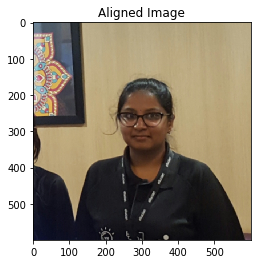

In [0]:
# Display the results
plt.imshow(imNorm[:,:,::-1])
plt.title("Aligned Image")
plt.show()

## How to stabilize landmark points in a video

When you use Dlib’s Facial Landmark Detection on a video, you will notice they jiggle a bit. When the video is obtained under good and consistent lighting conditions, the landmarks tend to be more stable than when the lighting or imaging conditions are bad.

One way to implement stabilization requires optical flow calculation. Fortunately, OpenCV has a good implementation of Lukas Kanade optical flow described in this section. It can be invoked using [calcOpticalFlowPyrLK](https://docs.opencv.org/4.1.0/dc/d6b/group__video__track.html#ga473e4b886d0bcc6b65831eb88ed93323)




```
nextPts, status, err = cv.calcOpticalFlowPyrLK(prevImg, nextImg, prevPts, nextPts[, status[, err[, winSize[, maxLevel[, criteria[, flags[, minEigThreshold]]]]]]])
```

Where,


`prevImg` - first 8-bit input image or pyramid constructed by buildOpticalFlowPyramid.
nextImg - second input image or pyramid of the same size and the same type as prevImg.

`prevPts` - vector of 2D points for which the flow needs to be found; point coordinates must be single-precision floating-point numbers.

`nextPts` - output vector of 2D points (with single-precision floating-point coordinates) containing the calculated new positions of input features in the second image; when OPTFLOW_USE_INITIAL_FLOW flag is passed, the vector must have the same size as in the input.

`status` - output status vector (of unsigned chars); each element of the vector is set to 1 if the flow for the corresponding features has been found, otherwise, it is set to 0.

`err` - output vector of errors; each element of the vector is set to an error for the corresponding feature, type of the error measure can be set in flags parameter; if the flow wasn't found then the error is not defined (use the status parameter to find such cases).

`winSize` - size of the search window at each pyramid level. maxLevel 0-based maximal pyramid level number; if set to 0, pyramids are not used (single level), if set to 1, two levels are used, and so on; if pyramids are passed to input then algorithm will use as many levels as pyramids have but no more than maxLevel.

`criteria` - parameter, specifying the termination criteria of the iterative search algorithm (after the specified maximum number of iterations criteria.maxCount or when the search window moves by less than criteria.epsilon.

`flags` - operation flags:
*   `OPTFLOW_USE_INITIAL_FLOW` - uses initial estimations, stored in nextPts; if the flag is not set, then prevPts is copied to nextPts and is considered the initial estimate.
*   `OPTFLOW_LK_GET_MIN_EIGENVALS` - use minimum eigen values as an error measure (see minEigThreshold description); if the flag is not set, then L1 distance between patches around the original and a moved point, divided by number of pixels in a window, is used as a error measure.

`minEigThreshold` - the algorithm calculates the minimum eigen value of a 2x2 normal matrix of optical flow equations (this matrix is called a spatial gradient matrix), divided by number of pixels in a window; if this value is less than minEigThreshold, then a corresponding feature is filtered out and its flow is not processed, so it allows to remove bad points and get a performance boost.


As mentioned earlier, optical flow computation requires building Image pyramids for the current frame and the previous frame. **calcOpticalFlowPyrLKdoes** this calculation internally when you pass the previous frame and the current frame. When using optical flow in a video, the image pyramid for the same frame is built twice -- once while doing optical flow calculation for the current frame and the other for the next frame. This double calculation can be avoided by building and storing the image pyramid for every frame and passing it to **calcOpticalFlowPyrLK**.

The most common usage of [buildOpticalFlowPyramid](https://docs.opencv.org/4.1.0/dc/d6b/group__video__track.html#ga86640c1c470f87b2660c096d2b22b2ce) is shown below.



```
retval,pyramid = cv.buildOpticalFlowPyramid(img, winSize, maxLevel[, pyramid[, withDerivatives[, pyrBorder[, derivBorder[, tryReuseInputImage]]]]])
```

**Where,**

`img` - 8-bit input image.

`pyramid` - output pyramid.

`winSize` - window size of optical flow algorithm. Must be not less than winSize argument of calcOpticalFlowPyrLK. It is needed to calculate required padding for pyramid levels.

`maxLevel` - 0-based maximal pyramid level number.

`withDerivatives` - set to precompute gradients for the every pyramid level. If pyramid is constructed without the gradients then calcOpticalFlowPyrLK will calculate them internally.

`pyrBorder` - the border mode for pyramid layers.

`derivBorder` - the border mode for gradients.

`tryReuseInputImage` - put ROI of input image into the pyramid if possible. You can pass false to force data copying.

In [0]:
RESIZE_HEIGHT = 480
NUM_FRAMES_FOR_FPS = 100
SKIP_FRAMES = 1

In [0]:
# Function to calculate the intereye distance.
def interEyeDistance(predict):
  leftEyeLeftCorner = (predict[36].x, predict[36].y)
  rightEyeRightCorner = (predict[45].x, predict[45].y)
  distance = cv2.norm(np.array(rightEyeRightCorner) - np.array(leftEyeLeftCorner))
  distance = int(distance)
  return distance

#### Process Video

In [0]:
winName = "Stabilized facial landmark detector"

videoFileName = "test.mov"

# Initializing video capture object.
cap = cv2.VideoCapture(videoFileName)

if(cap.isOpened()==False):
  print("Unable to load video")

Specifying the parameters of Lucas Kanade Method

In [0]:
winSize = 101
maxLevel = 10
fps = 30.0
# Grab a frame
ret, imPrev = cap.read()
imGrayPrev = cv2.cvtColor(imPrev, cv2.COLOR_BGR2GRAY)

In [0]:
# Finding the size of the image.
size = imPrev.shape[0:1]

Initializing the points

In [0]:
# Initializing the parameters
points=[]
pointsPrev=[]
pointsDetectedCur=[]
pointsDetectedPrev=[]

In [0]:
eyeDistanceNotCalculated = True
eyeDistance = 0
isFirstFrame = True
# Initial value, actual value calculated after 100 frames
fps = 10
showStabilized = True
count = 0

## Use Detection + Tracking for stabilization

As discussed above, we detect the landmarks in each frame and also use the LK method to track the points in the current frame w.r.t. previous frame. Then we take a weighted average of the two measurements and that is the stabilized landmarks point. 

In [0]:
# Grab next frame
ret, im = cap.read()
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
video = cv2.VideoWriter('./test_out.avi', fourcc, 30, (im.shape[1]+im.shape[1]+im.shape[1], im.shape[0]))

while (ret):
    try:
        # print(count)
        if (count == 0):
            t = cv2.getTickCount()

        im_orig = im.copy()

        imDlib = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        # COnverting to grayscale
        imGray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        height = im.shape[0]
        IMAGE_RESIZE = float(height) / RESIZE_HEIGHT
        # Resize image for faster face detection
        imSmall = cv2.resize(im, None, fx=1.0 / IMAGE_RESIZE, fy=1.0 / IMAGE_RESIZE, interpolation=cv2.INTER_LINEAR)
        imSmallDlib = cv2.cvtColor(imSmall, cv2.COLOR_BGR2RGB)            

        # Skipping the frames for faster processing
        if (count % SKIP_FRAMES == 0):
            faces = faceDetector(imSmallDlib, 0)

        # If no face was detected
        if len(faces) == 0:
            print("No face detected")

        # If faces are detected, iterate through each image and detect landmark points
        else:
            for i in range(0, len(faces)):
                # print("face detected")
                # Face detector was found over a smaller image.
                # So, we scale face rectangle to correct size.
                newRect = dlib.rectangle(int(faces[i].left() * IMAGE_RESIZE),
                                         int(faces[i].top() * IMAGE_RESIZE),
                                         int(faces[i].right() * IMAGE_RESIZE),
                                         int(faces[i].bottom() * IMAGE_RESIZE))

                # Detect landmarks in current frame
                landmarks = landmarkDetector_64(imDlib, newRect).parts()

                # Handling the first frame of video differently,for the first frame copy the current frame points

                if (isFirstFrame == True):
                    pointsPrev = []
                    pointsDetectedPrev = []
                    [pointsPrev.append((p.x, p.y)) for p in landmarks]
                    [pointsDetectedPrev.append((p.x, p.y)) for p in landmarks]

                # If not the first frame, copy points from previous frame.
                else:
                    pointsPrev = []
                    pointsDetectedPrev = []
                    pointsPrev = points
                    pointsDetectedPrev = pointsDetectedCur

                # pointsDetectedCur stores results returned by the facial landmark detector
                # points stores the stabilized landmark points
                points = []
                pointsDetectedCur = []
                [points.append((p.x, p.y)) for p in landmarks]
                [pointsDetectedCur.append((p.x, p.y)) for p in landmarks]

                # Convert to numpy float array
                pointsArr = np.array(points, np.float32)
                pointsPrevArr = np.array(pointsPrev, np.float32)

                # If eye distance is not calculated before
                if eyeDistanceNotCalculated:
                    eyeDistance = interEyeDistance(landmarks)
                    # print(eyeDistance)
                    eyeDistanceNotCalculated = False

                if eyeDistance > 100:
                    dotRadius = 3
                else:
                    dotRadius = 2

                # print(eyeDistance)
                sigma = eyeDistance * eyeDistance / 400
                s = 2 * int(eyeDistance / 4) + 1

                #  Set up optical flow params
                lk_params = dict(winSize=(s, s), maxLevel=5,
                                 criteria=(cv2.TERM_CRITERIA_COUNT | cv2.TERM_CRITERIA_EPS, 20, 0.03))
                # Python Bug. Calculating pyramids and then calculating optical flow results in an error. So directly images are used.
                # ret, imGrayPyr= cv2.buildOpticalFlowPyramid(imGray, (winSize,winSize), maxLevel)

                pointsArr, status, err = cv2.calcOpticalFlowPyrLK(imGrayPrev, imGray, pointsPrevArr, pointsArr, **lk_params)

                # Converting to float
                pointsArrFloat = np.array(pointsArr, np.float32)

                # Converting back to list
                points = pointsArrFloat.tolist()

                # Final landmark points are a weighted average of
                # detected landmarks and tracked landmarks
                for k in range(0, len(landmarks)):
                    d = cv2.norm(np.array(pointsDetectedPrev[k]) - np.array(pointsDetectedCur[k]))
                    alpha = math.exp(-d * d / sigma)
                    points[k] = (1 - alpha) * np.array(pointsDetectedCur[k]) + alpha * np.array(points[k])

                # Drawing over the stabilized landmark points
                if showStabilized is True:
                    for p in points:
                        cv2.circle(im, (int(p[0]), int(p[1])), dotRadius, (255, 0, 0), -1)
                else:
                    for p in pointsDetectedCur:
                        cv2.circle(im, (int(p[0]), int(p[1])), dotRadius, (0, 0, 255), -1)

                isFirstFrame = False
                count = count + 1

                # Calculating the fps value
                if (count == NUM_FRAMES_FOR_FPS):
                    t = (cv2.getTickCount() - t) / cv2.getTickFrequency()
                    fps = NUM_FRAMES_FOR_FPS / t
                    count = 0
                    isFirstFrame = True

                # Display the landmarks points
                cv2.putText(im, "{:.1f}-fps".format(fps), (50, size[0] - 50), cv2.FONT_HERSHEY_COMPLEX, 1.5, (0, 0, 255), 3,
                            cv2.LINE_AA)

                #   # Use spacebar to toggle between Stabilized and Unstabilized version.
                #   if key==32:
                #     showStabilized = not showStabilized

                #   # Stop the program.
                #   if key==27:
                #     sys.exit()
                # Getting ready for next frame

                # Detect landmarks. (For the biggest face in image)
                im_align = im_orig.copy()
                # points_5 = getLandmarks(faceDetector, landmarkDetector_5, im_align)
                points_align = np.array(points)

                # Convert image to floating point in the range 0 to 1
                im_align = np.float32(im_align)/255.0

                # Normalize image to output coordinates.
                imNorm, points_align = normalizeImagesAndLandmarks((int(im_align.shape[0]*0.5), int(im_align.shape[1]*0.5)), im_align, points_align)

                imNorm = np.uint8(imNorm*255)

                # plt.imshow(imNorm[:,:,::-1])
                # plt.title("Aligned Image")
                # plt.show()

                im_align_resized = cv2.resize(imNorm, (im_align.shape[1], im_align.shape[0]))

                video.write(np.concatenate((im_orig, im, im_align_resized), axis=1))

                imPrev = im
                imGrayPrev = imGray

                # Grab next frame
                ret, im = cap.read()
    except Exception as e:
        print("Error: {}".format(e))
        break

# cv2.destroyAllwindows()
cap.release()
video.release()
print("Finished Processing..!!")

Finished Processing..!!


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp test_out.avi /content/drive/My\ Drive/